In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [2]:
exited_df_3 = pd.read_csv("Exited_Companies.csv", encoding='unicode_escape')

In [3]:
emerging_df_3 = pd.read_csv("Emerging_Companies.csv", encoding='unicode_escape')

### Emerging Unicorn Companies.

In [4]:
emerging_df_3.head()

Company  Post Money Value  Total Equity Funding  \
0     Nxtra Data               986                   237   
1  Butternut Box               985                   467   
2        Delphix               981                   120   
3        Bizongo               980                   290   
4      OpenStore               970                   137   

  Lead Investors Include         Country      Continent  
0      The Carlyle Group           India           Asia  
1       General Atlantic  United Kingdom         Europe  
2               Fidelity   United States  North America  
3         Schroder Adveq           India           Asia  
4            Lux Capital   United States  North America

In [5]:
# Display data types of each column
data_types_report = emerging_df_3.dtypes

# Count the number of categorical and numerical columns
categorical_columns = emerging_df_3.select_dtypes(include='object').columns
numerical_columns = emerging_df_3.select_dtypes(exclude='object').columns

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

# Print the report
print("Data Types Report:")
print(data_types_report)
print("\nNumber of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Data Types Report:
Company                   object
Post Money Value           int64
Total Equity Funding       int64
Lead Investors Include    object
Country                   object
Continent                 object
dtype: object

Number of Categorical Columns: 4
Number of Numerical Columns: 2


In [6]:
emerging_df_3.describe()

Post Money Value  Total Equity Funding
count        383.000000            383.000000
mean         680.130548            177.018277
std          142.145283            113.246902
min          500.000000              0.000000
25%          550.000000            108.500000
50%          662.000000            154.000000
75%          800.000000            218.000000
max          986.000000            935.000000

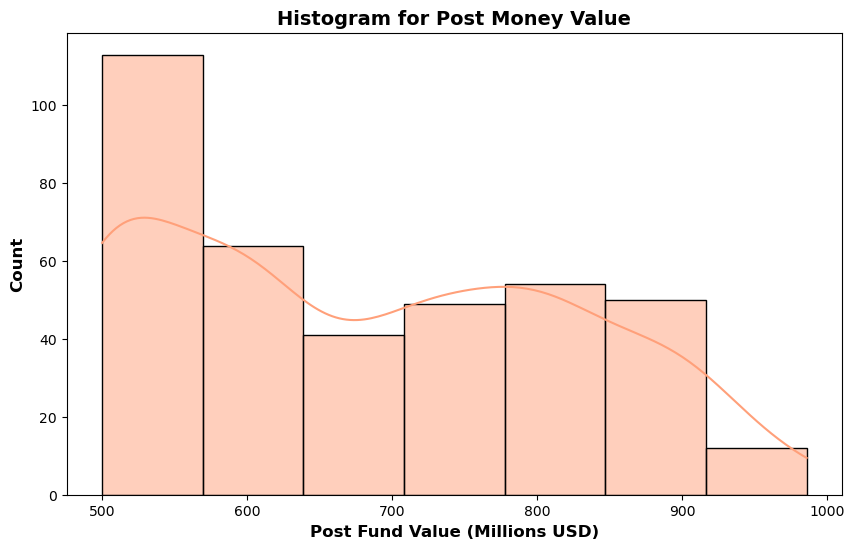

In [7]:
# Create a histogram for Post Money Value
plt.figure(figsize=(10, 6))
sns.histplot(emerging_df_3['Post Money Value'], bins=7, kde=True, color='lightsalmon', edgecolor='black')
plt.title('Histogram for Post Money Value', fontsize=14, fontweight='bold')
plt.xlabel('Post Fund Value (Millions USD)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

The histogram indicates that there's an outlier in our data, and it's skewed towards the left side. Specifically, it shows that a company called "Coro" was valued at only 0.298 million dollars in our dataset. However, we suspect that this is an outlier because a rising star in the business world, known as a unicorn, typically has a valuation well above $500 million.

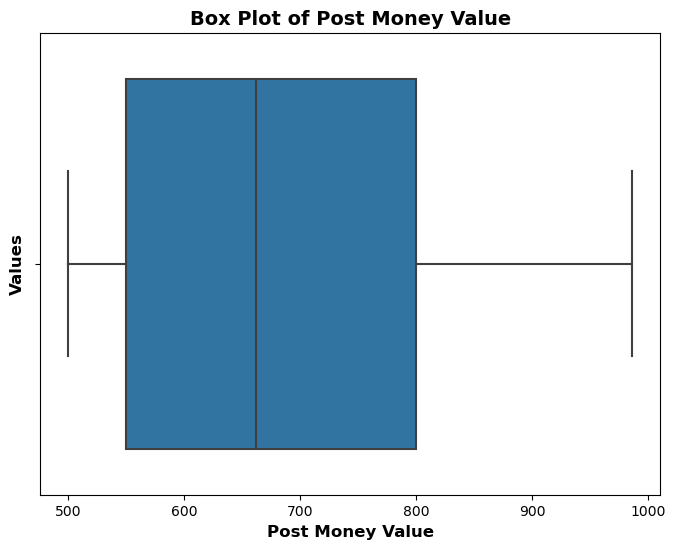

In [8]:
# Create box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=emerging_df_3['Post Money Value'])

# Add title and labels
plt.title('Box Plot of Post Money Value', fontsize=14, fontweight='bold')
plt.xlabel('Post Money Value', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.show()

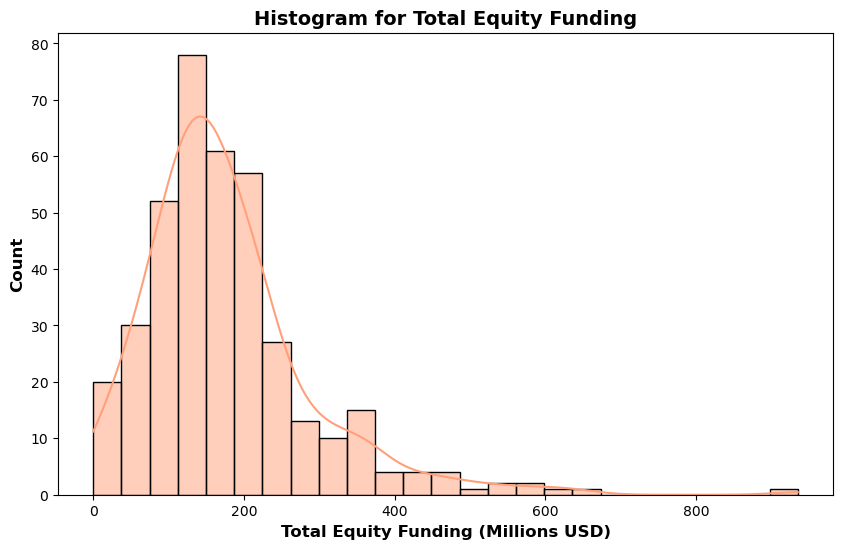

In [9]:
# Create a histogram for Total Equity Funding
plt.figure(figsize=(10, 6))
sns.histplot(emerging_df_3['Total Equity Funding'], bins=25, kde=True, color='lightsalmon', edgecolor='black')
plt.title('Histogram for Total Equity Funding', fontsize=14, fontweight='bold')
plt.xlabel('Total Equity Funding (Millions USD)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

According to the histogram, the majority of the companies' total equity funding ranges from 0 to 200 million. There is one company that has received over 800 million total equity funding. Despite being an outlier, it is acceptable. There may be companies with a total equity fund of more than 800 million.

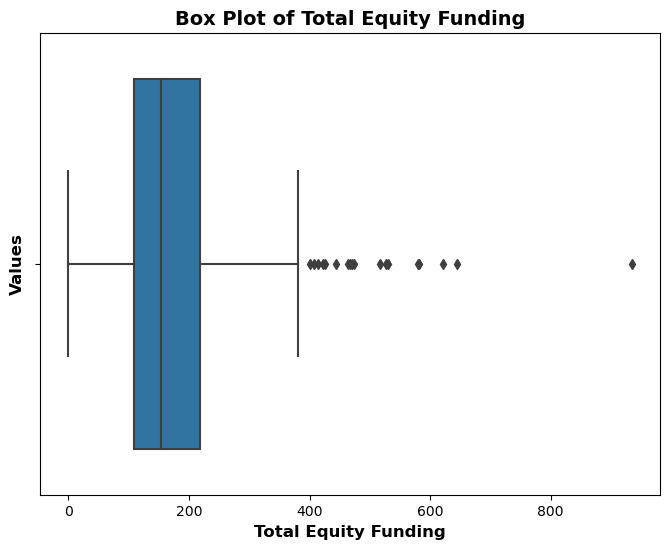

In [10]:
# Create box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=emerging_df_3['Total Equity Funding'])

# Add title and labels
plt.title('Box Plot of Total Equity Funding', fontsize=14, fontweight='bold')
plt.xlabel('Total Equity Funding', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.show()

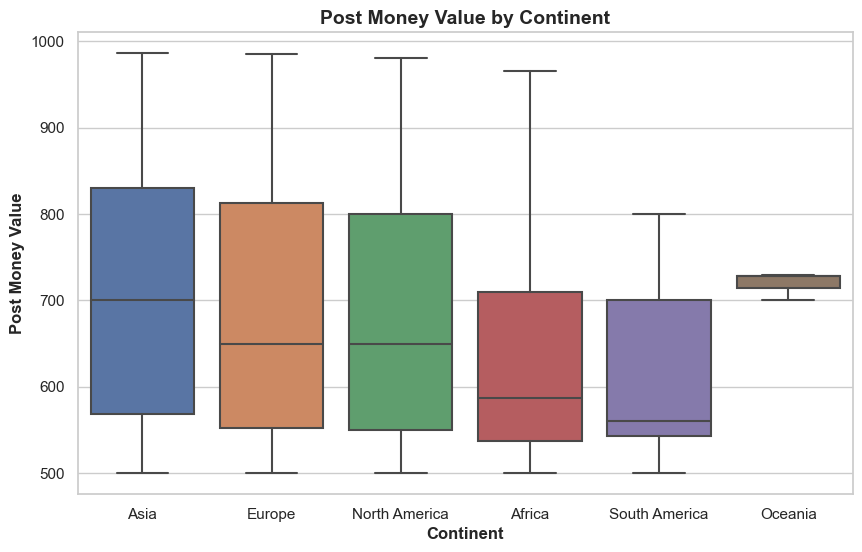

In [11]:
# Set the style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6)) # Adjust size if necessary
sns.boxplot(data=emerging_df_3, x='Continent', y='Post Money Value')

# Set title and labels
plt.title('Post Money Value by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent', fontsize=12, fontweight='bold')
plt.ylabel('Post Money Value', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

#### K Means Clustering Model Creation

In [12]:
# Check the number of missing values
missing_values = emerging_df_3.isna().sum()
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
Company                   0
Post Money Value          0
Total Equity Funding      0
Lead Investors Include    0
Country                   0
Continent                 0
dtype: int64


In [13]:
# Isolate all numeric features
emerging_df_3_num = emerging_df_3.select_dtypes(exclude=['object'])
emerging_df_3_num.head()

Post Money Value  Total Equity Funding
0               986                   237
1               985                   467
2               981                   120
3               980                   290
4               970                   137

C:\Users\chith\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


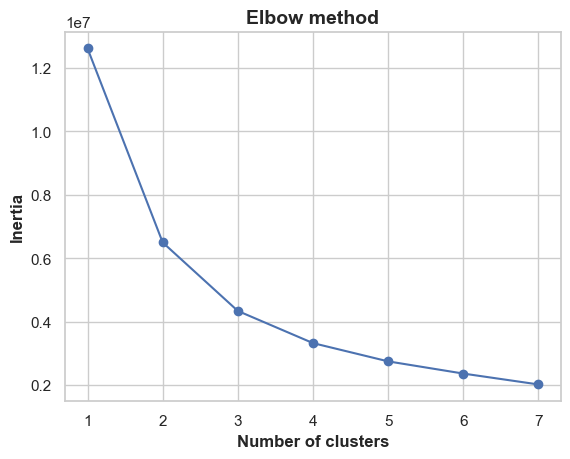

In [14]:
# elbow point refers to the point on the plot where the inertia values start decreasing at a slower rate. 
# visualize the inertia values for different numbers of clusters in order to identify the optimal number of clusters using the elbow method.

inertias = []  # Initialize the list before the loop

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(emerging_df_3_num)
    inertias.append(kmeans.inertia_) # represents the sum of squared distances of samples to their closest cluster center

plt.plot(range(1, 8), inertias, marker='o')
plt.title('Elbow method', fontsize=14, fontweight='bold')
plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Inertia', fontsize=12, fontweight='bold')
plt.show()

In [15]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to your data
kmeans.fit(emerging_df_3_num)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

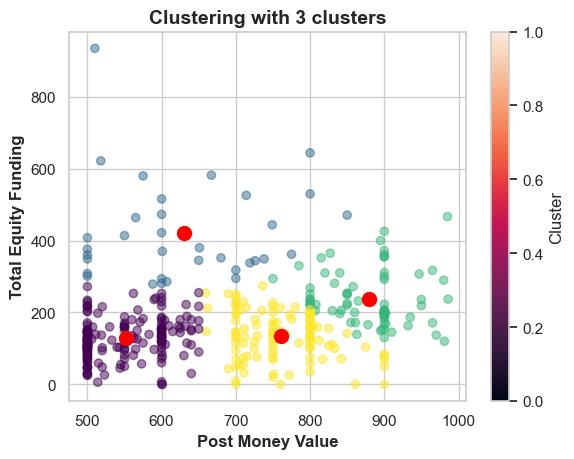

In [16]:
# Assuming the columns of your DataFrame are named 'feature1' and 'feature2'
feature1 = emerging_df_3_num['Post Money Value']
feature2 = emerging_df_3_num['Total Equity Funding']

# Create a scatter plot of the data points with their assigned clusters
plt.scatter(feature1, feature2, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', s=100)  # Plot centroids

plt.title('Clustering with 3 clusters', fontsize=14, fontweight='bold')
plt.xlabel('Post Money Value', fontsize=12, fontweight='bold')
plt.ylabel('Total Equity Funding', fontsize=12, fontweight='bold')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#### K Modes Clustering Model Creation

In [17]:
# Isolate all categorical features
emerging_df_3_cat = emerging_df_3.select_dtypes(include=['object'])
emerging_df_3_cat.head()

Company Lead Investors Include         Country      Continent
0     Nxtra Data      The Carlyle Group           India           Asia
1  Butternut Box       General Atlantic  United Kingdom         Europe
2        Delphix               Fidelity   United States  North America
3        Bizongo         Schroder Adveq           India           Asia
4      OpenStore            Lux Capital   United States  North America

In [18]:
! pip install kmodes

In [19]:
new_df = emerging_df_3[['Lead Investors Include', 'Country']]
new_df

Lead Investors Include         Country
0                                The Carlyle Group           India
1                                 General Atlantic  United Kingdom
2                                         Fidelity   United States
3                                   Schroder Adveq           India
4                                      Lux Capital   United States
..                                             ...             ...
378                                Explorer 1 Fund   United States
379  Andreessen Horowitz, Richmond Global Ventures   United States
380             Counterpoint Global, Liberty Media   United States
381                       Penske Media Corporation   United States
382                      Kleiner Perkins, Paradigm         Bahrain

[383 rows x 2 columns]

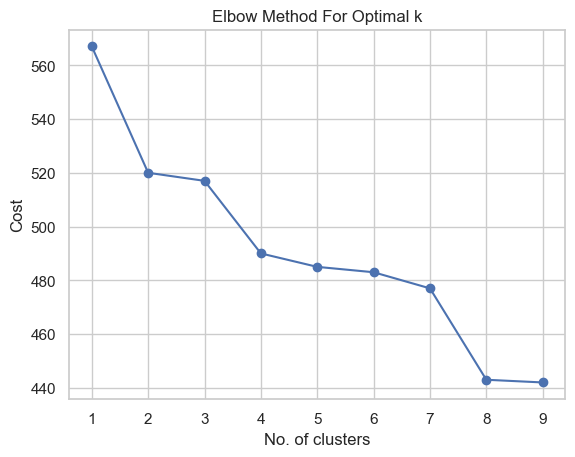

In [20]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow chart is changing in every run because of the random initialization of centroids in the K-Modes clustering algorithm. In the K-Modes algorithm, the initial centroids are randomly chosen at the beginning of each run, which can lead to slightly different clustering results each time the algorithm is run.
To address this issue, you can set a random seed before running the clustering algorithm to ensure reproducibility. For example, you can use random_state parameter in the KModes function to set a specific random seed

In [21]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=7, init = "random", n_init = 5, verbose=0)
clusters = kmode.fit_predict(new_df)
clusters

array([1, 0, 3, 1, 3, 0, 0, 3, 3, 1, 0, 0, 3, 0, 3, 0, 1, 3, 3, 1, 0, 1,
       1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0,
       0, 2, 0, 5, 0, 5, 0, 0, 2, 0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 1, 3, 5,
       3, 0, 0, 0, 3, 3, 0, 1, 5, 1, 5, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 3, 0, 5, 0, 3, 1, 3, 5, 0, 3, 3, 3, 3, 0, 0, 1, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 5, 1, 0, 0, 3, 0, 0, 6, 0, 3, 3, 3,
       0, 0, 1, 0, 0, 0, 1, 1, 3, 3, 3, 3, 0, 0, 4, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 1, 0, 3, 1, 1, 5, 5, 6, 6, 3, 1, 3,
       3, 3, 0, 6, 3, 0, 0, 3, 0, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3,
       3, 1, 0, 1, 6, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3,
       3, 1, 6, 3, 3, 1, 0, 3, 1, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0,
       5, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 1, 3,

In [22]:
new_df.insert(0, "Cluster", clusters, True)
new_df

Cluster                         Lead Investors Include         Country
0          1                              The Carlyle Group           India
1          0                               General Atlantic  United Kingdom
2          3                                       Fidelity   United States
3          1                                 Schroder Adveq           India
4          3                                    Lux Capital   United States
..       ...                                            ...             ...
378        3                                Explorer 1 Fund   United States
379        3  Andreessen Horowitz, Richmond Global Ventures   United States
380        3             Counterpoint Global, Liberty Media   United States
381        3                       Penske Media Corporation   United States
382        0                      Kleiner Perkins, Paradigm         Bahrain

[383 rows x 3 columns]

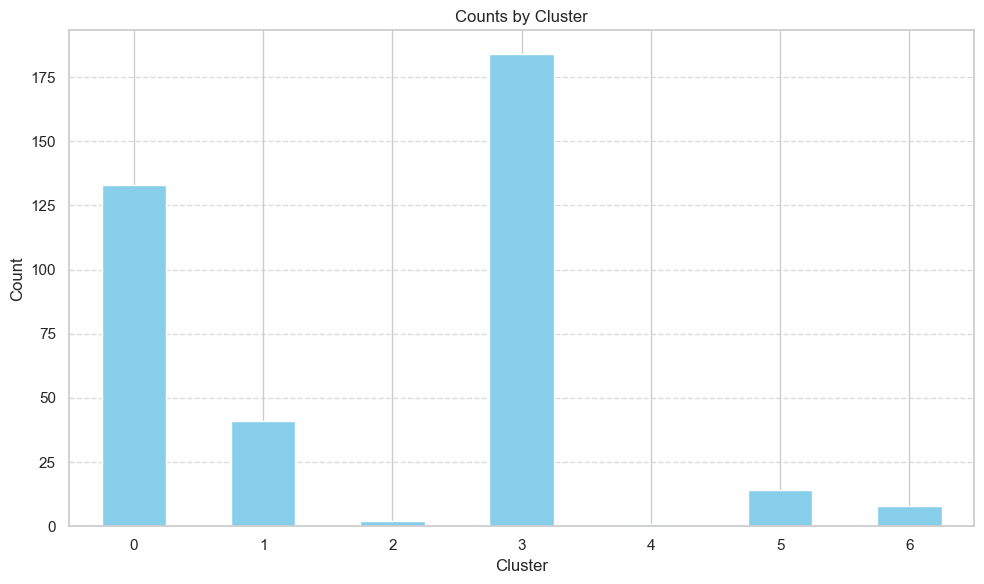

In [23]:
import matplotlib.pyplot as plt

# Assuming new_df is a DataFrame with columns "Cluster" and "Lead Investors Include", and "Country"
# Grouping by Cluster and counting the occurrences
cluster_counts = new_df.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Emerging Unicorns Country.csv'

# Export the dataframe to a CSV file
new_df.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Emerging Unicorns Country.csv.


In [25]:
new_df_1 = emerging_df_3[['Lead Investors Include', 'Continent']]
new_df_1

Lead Investors Include      Continent
0                                The Carlyle Group           Asia
1                                 General Atlantic         Europe
2                                         Fidelity  North America
3                                   Schroder Adveq           Asia
4                                      Lux Capital  North America
..                                             ...            ...
378                                Explorer 1 Fund  North America
379  Andreessen Horowitz, Richmond Global Ventures  North America
380             Counterpoint Global, Liberty Media  North America
381                       Penske Media Corporation  North America
382                      Kleiner Perkins, Paradigm           Asia

[383 rows x 2 columns]

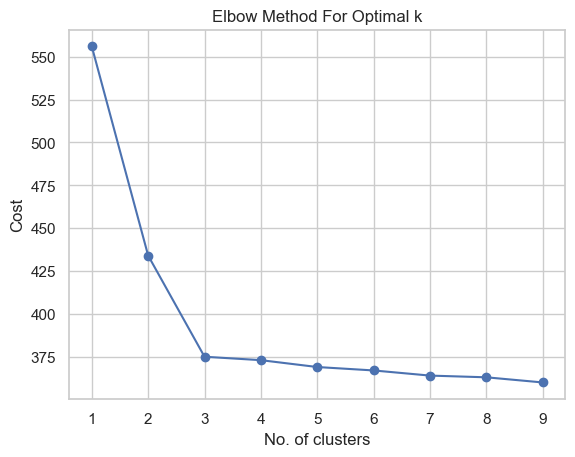

In [26]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    #kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(new_df_1)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=0)
clusters = kmode.fit_predict(new_df_1)
clusters

array([1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,

In [28]:
new_df_1.insert(0, "Cluster", clusters, True)
new_df_1

Cluster                         Lead Investors Include      Continent
0          1                              The Carlyle Group           Asia
1          2                               General Atlantic         Europe
2          0                                       Fidelity  North America
3          1                                 Schroder Adveq           Asia
4          0                                    Lux Capital  North America
..       ...                                            ...            ...
378        0                                Explorer 1 Fund  North America
379        0  Andreessen Horowitz, Richmond Global Ventures  North America
380        0             Counterpoint Global, Liberty Media  North America
381        0                       Penske Media Corporation  North America
382        1                      Kleiner Perkins, Paradigm           Asia

[383 rows x 3 columns]

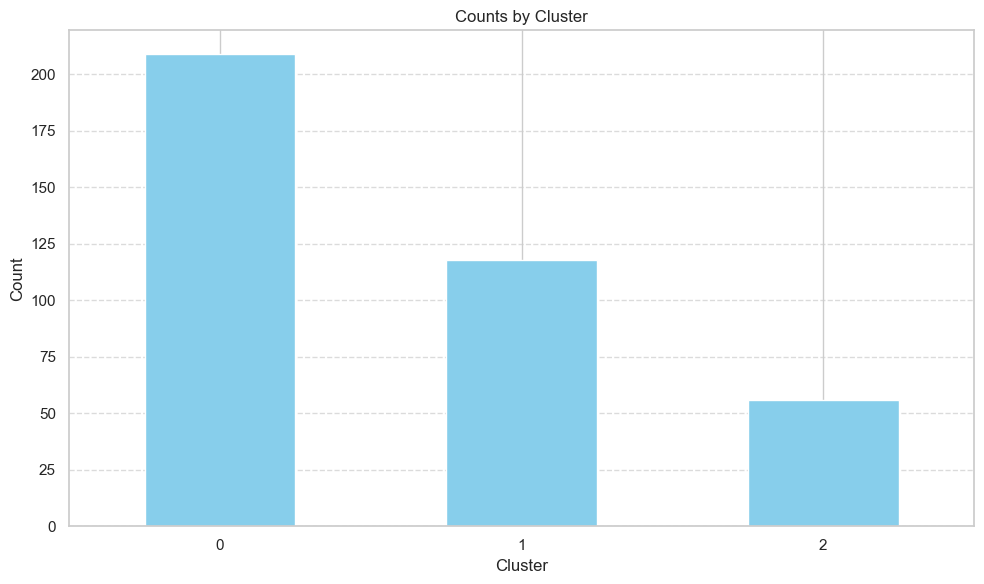

In [29]:
import matplotlib.pyplot as plt

# Assuming new_df is a DataFrame with columns "Cluster" and "Lead Investors Include", and "Country"
# Grouping by Cluster and counting the occurrences
cluster_counts = new_df_1.groupby("Cluster").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind="bar", color='skyblue')
plt.title("Counts by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Emerging Unicorns Continent.csv'

# Export the dataframe to a CSV file
new_df_1.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Emerging Unicorns Continent.csv.


### Exited Unicron Comapnies

In [31]:
exited_df_3.head()

Organisation        Country  \
0            10X Genomics  United States   
1                 17zuoye          China   
2                 23andMe  United States   
3  51 Credit Card Manager          China   
4                9F Group          China   

                                            Industry  \
0  BioSoftware & Technology, Genetics, Health Car...   
1  E-Learning, EdTech, Education, Internet, Langu...   
2   BioSoftware & Technology, Genetics, Life Science   
3  Credit Cards, Finance, Financial Services, Fin...   
4                        Financial Services, FinTech   

                Main Industry      Month  Year  Exit Reason Main Reason  
0  Healthcare & BioTechnology  September  2019     Bankrupt    Bankrupt  
1        Education and EdTech   December  2020     Bankrupt    Bankrupt  
2  Healthcare & BioTechnology       June  2021  SPAC merger      Merger  
3         Finance and FinTech       July  2018     Bankrupt    Bankrupt  
4         Finance and FinTech     August  2019          IPO         IPO

In [32]:
# Display data types of each column
data_types_report = exited_df_3.dtypes

# Count the number of categorical and numerical columns
categorical_columns = exited_df_3.select_dtypes(include='object').columns
numerical_columns = exited_df_3.select_dtypes(exclude='object').columns

num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

# Print the report
print("Data Types Report:")
print(data_types_report)
print("\nNumber of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Data Types Report:
Organisation     object
Country          object
Industry         object
Main Industry    object
Month            object
Year              int64
Exit Reason      object
Main Reason      object
dtype: object

Number of Categorical Columns: 7
Number of Numerical Columns: 1


In [33]:
exited_df_3.describe()

Year
count   468.000000
mean   2019.506410
std       2.595904
min    2006.000000
25%    2018.000000
50%    2020.000000
75%    2021.000000
max    2023.000000

#### K Modes Clustering Model Creation

In [34]:
Exited_industry_vs_reason_df = exited_df_3[['Main Industry', 'Main Reason']]
Exited_industry_vs_reason_df

Main Industry Main Reason
0    Healthcare & BioTechnology    Bankrupt
1          Education and EdTech    Bankrupt
2    Healthcare & BioTechnology      Merger
3           Finance and FinTech    Bankrupt
4           Finance and FinTech         IPO
..                          ...         ...
463       Software & Technology      Merger
464       Software & Technology         IPO
465       Software & Technology    Bankrupt
466     Media and Entertainment         IPO
467       E-Commerce and Retail    Acquired

[468 rows x 2 columns]

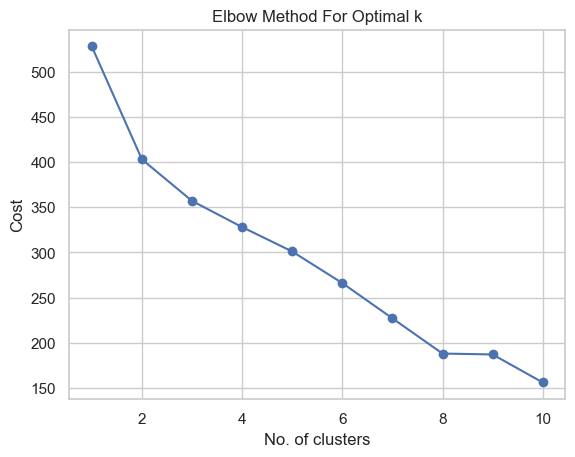

In [35]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=0, random_state=42)
    kmode.fit_predict(Exited_industry_vs_reason_df)
    cost.append(kmode.cost_) # Cost is the sum of all the dissimilarities between the clusters
    
plt.plot(K, cost, marker = 'o')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=0)
clusters = kmode.fit_predict(Exited_industry_vs_reason_df)
clusters

array([0, 0, 0, 5, 5, 1, 3, 0, 5, 5, 0, 1, 7, 1, 1, 7, 0, 0, 7, 1, 1, 7,
       0, 5, 3, 1, 1, 0, 7, 0, 3, 1, 3, 5, 1, 5, 6, 0, 6, 3, 5, 0, 0, 1,
       5, 0, 0, 6, 1, 5, 0, 3, 5, 0, 5, 7, 6, 7, 5, 0, 3, 6, 0, 0, 1, 3,
       1, 3, 0, 0, 0, 3, 0, 3, 5, 0, 7, 0, 5, 7, 7, 3, 1, 5, 6, 7, 7, 5,
       1, 0, 0, 1, 0, 7, 0, 1, 5, 3, 6, 6, 7, 6, 0, 5, 1, 0, 3, 1, 0, 5,
       5, 1, 1, 7, 7, 1, 7, 1, 7, 0, 3, 6, 5, 0, 0, 0, 5, 1, 6, 3, 0, 7,
       6, 3, 6, 1, 1, 1, 5, 0, 6, 0, 5, 1, 7, 5, 5, 0, 3, 6, 0, 0, 1, 7,
       1, 6, 6, 1, 0, 7, 0, 3, 0, 0, 5, 6, 0, 1, 1, 0, 0, 5, 0, 6, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 6, 1, 0, 0, 0, 6, 3, 7, 3, 0, 0, 1,
       5, 5, 0, 0, 1, 7, 0, 0, 1, 7, 7, 5, 0, 0, 0, 0, 5, 5, 6, 5, 3, 1,
       1, 3, 7, 5, 6, 1, 7, 5, 3, 6, 0, 3, 0, 0, 7, 1, 5, 0, 1, 6, 7, 6,
       3, 0, 6, 1, 0, 0, 0, 7, 3, 0, 7, 0, 6, 1, 7, 0, 5, 0, 7, 0, 0, 3,
       3, 0, 5, 7, 5, 7, 0, 0, 7, 0, 5, 5, 0, 0, 0, 0, 1, 0, 0, 1, 5, 1,
       5, 0, 0, 1, 0, 7, 7, 3, 0, 3, 5, 0, 0, 6, 0,

In [37]:
Exited_industry_vs_reason_df.insert(0, "Cluster", clusters, True)
Exited_industry_vs_reason_df

Cluster               Main Industry Main Reason
0          0  Healthcare & BioTechnology    Bankrupt
1          0        Education and EdTech    Bankrupt
2          0  Healthcare & BioTechnology      Merger
3          5         Finance and FinTech    Bankrupt
4          5         Finance and FinTech         IPO
..       ...                         ...         ...
463        1       Software & Technology      Merger
464        7       Software & Technology         IPO
465        1       Software & Technology    Bankrupt
466        7     Media and Entertainment         IPO
467        6       E-Commerce and Retail    Acquired

[468 rows x 3 columns]

In [38]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'K modes Exited Unicorns.csv'

# Export the dataframe to a CSV file
Exited_industry_vs_reason_df.to_csv(csv_file_path, index=False)

print(f"Dataframe has been exported to {csv_file_path}.")

Dataframe has been exported to K modes Exited Unicorns.csv.
